In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data

--2023-03-22 04:50:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘magic04.data’

magic04.data        100%[===================>]   1.41M  1.51MB/s    in 0.9s    

2023-03-22 04:50:30 (1.51 MB/s) - ‘magic04.data’ saved [1477391/1477391]



In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"]  = (df["class"] == "g").astype(int)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


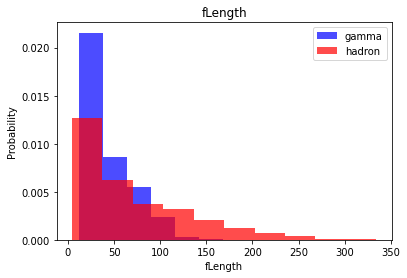

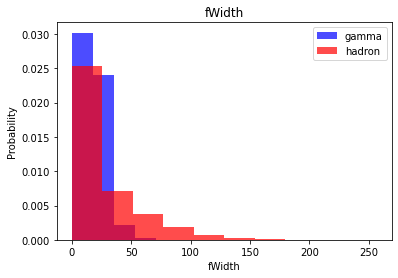

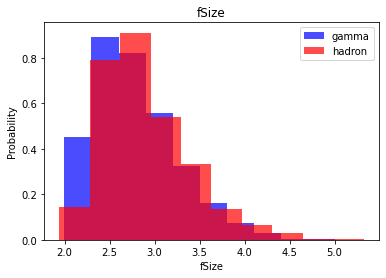

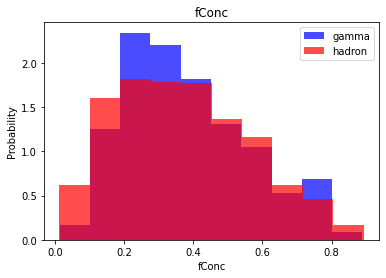

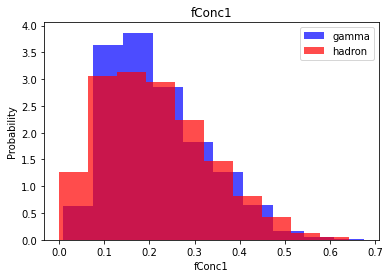

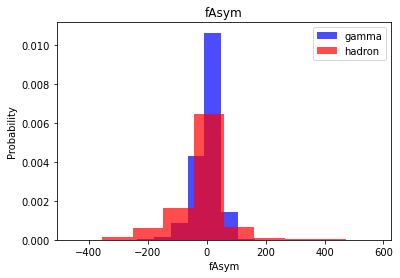

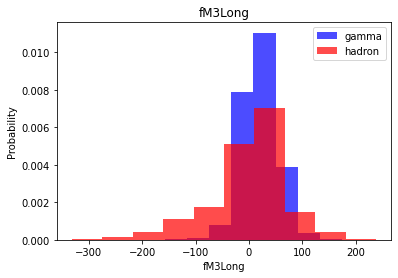

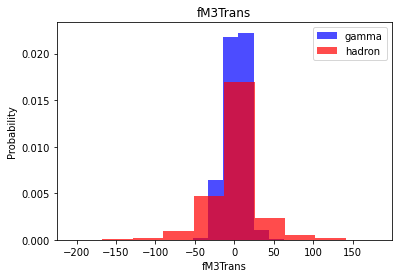

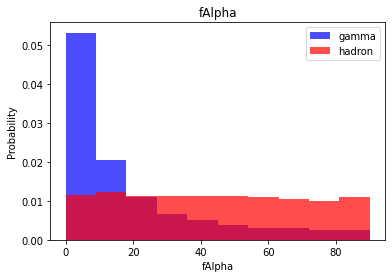

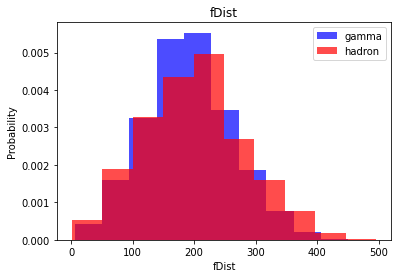

In [6]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # horizontally stack 2 arrays
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [9]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #hadron

7362
4050


In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [11]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

14724
7362
7362


# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1311
           1       0.83      0.88      0.85      2493

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1311
           1       0.74      0.89      0.81      2493

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1311
           1       0.84      0.82      0.83      2493

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



# Support Vector Machines (SVM)

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1311
           1       0.89      0.89      0.89      2493

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



#Neural Net

In [25]:
import tensorflow as tf

In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()


def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [50]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Binary crossentropy')
  ax2.grid(True)

  plt.show()

In [43]:
def train_model(X_train, y_train, num_nodes, dropout_probab, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10, )),
      tf.keras.layers.Dropout(dropout_probab),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_probab),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  
  history = nn_model.fit(
    X_train, y_train,
    epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


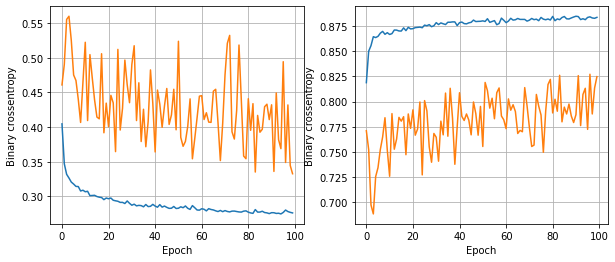

119/119 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8659
[0.32269421219825745, 0.8659306168556213]
16 nodes, dropout 0, lr 0.01, batch_size 64


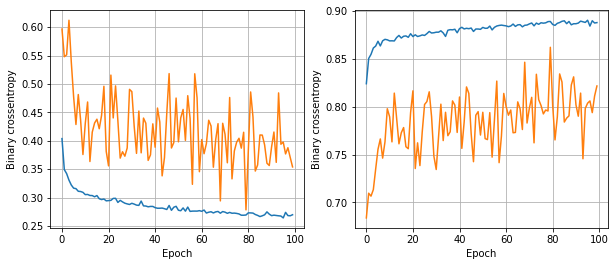

119/119 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8767
[0.3053610324859619, 0.8767087459564209]
16 nodes, dropout 0, lr 0.01, batch_size 128


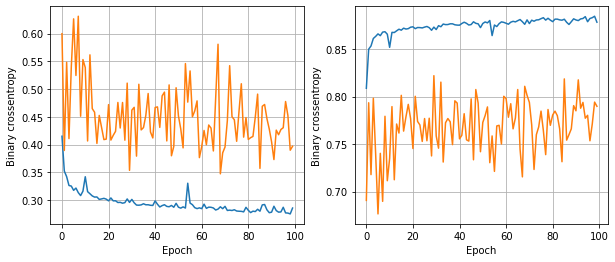

119/119 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8778
[0.3060363829135895, 0.8777602314949036]
16 nodes, dropout 0, lr 0.005, batch_size 32


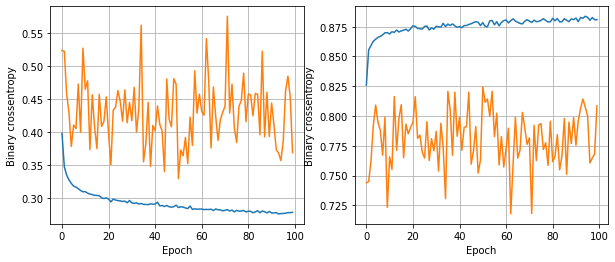

119/119 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8683
[0.3227026164531708, 0.8682965040206909]
16 nodes, dropout 0, lr 0.005, batch_size 64


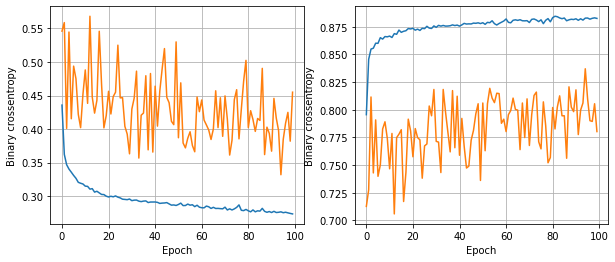

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8759
[0.31894102692604065, 0.8759200572967529]
16 nodes, dropout 0, lr 0.005, batch_size 128


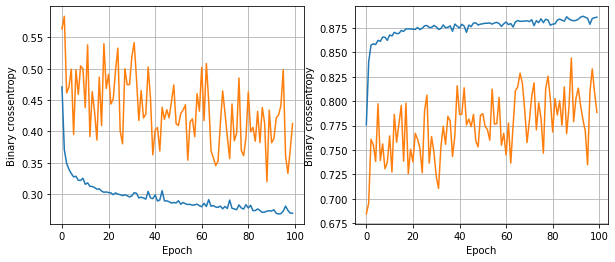

119/119 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8770
[0.31030967831611633, 0.8769716024398804]
16 nodes, dropout 0, lr 0.001, batch_size 32


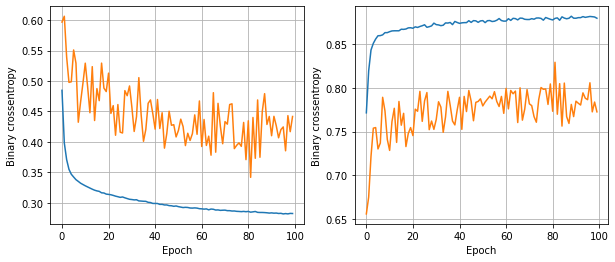

119/119 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8725
[0.3154561519622803, 0.8725026249885559]
16 nodes, dropout 0, lr 0.001, batch_size 64


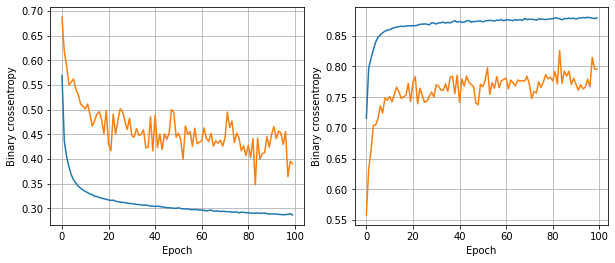

119/119 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8686
[0.31591105461120605, 0.8685594201087952]
16 nodes, dropout 0, lr 0.001, batch_size 128


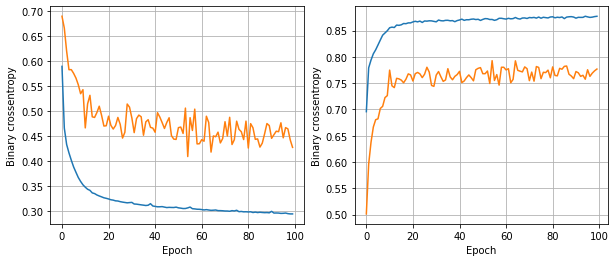

119/119 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8686
[0.31938549876213074, 0.8685594201087952]
16 nodes, dropout 0.2, lr 0.01, batch_size 32


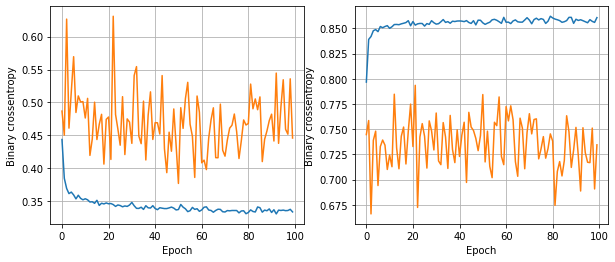

119/119 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8707
[0.32171446084976196, 0.8706624507904053]
16 nodes, dropout 0.2, lr 0.01, batch_size 64


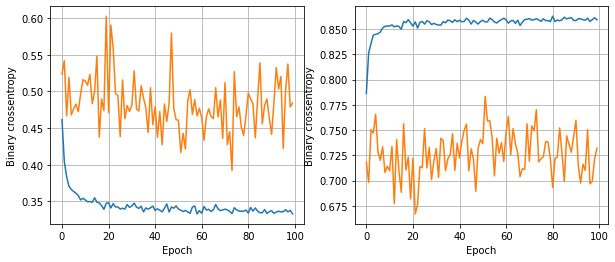

119/119 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8709
[0.32282859086990356, 0.8709253668785095]
16 nodes, dropout 0.2, lr 0.01, batch_size 128


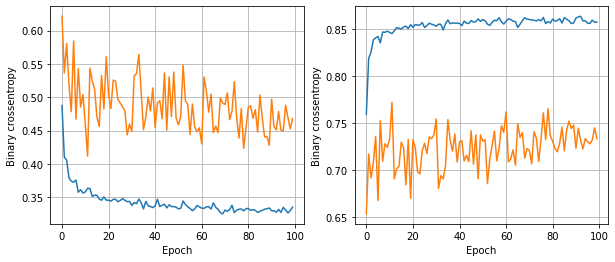

119/119 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.8707
[0.3155803084373474, 0.8706624507904053]
16 nodes, dropout 0.2, lr 0.005, batch_size 32


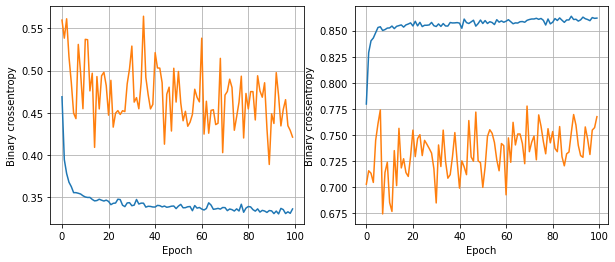

119/119 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8638
[0.32410335540771484, 0.8638275265693665]
16 nodes, dropout 0.2, lr 0.005, batch_size 64


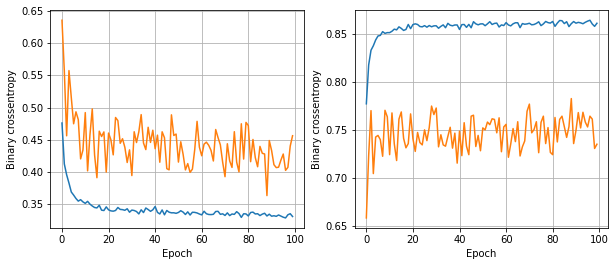

119/119 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8672
[0.32385551929473877, 0.8672450184822083]
16 nodes, dropout 0.2, lr 0.005, batch_size 128


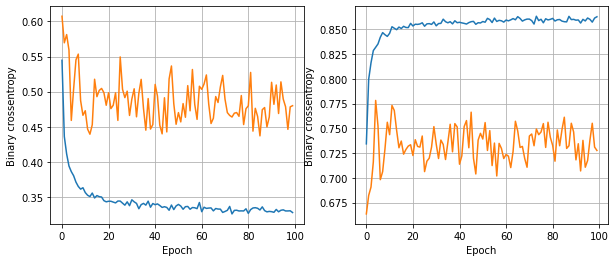

119/119 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8707
[0.32118186354637146, 0.8706624507904053]
16 nodes, dropout 0.2, lr 0.001, batch_size 32


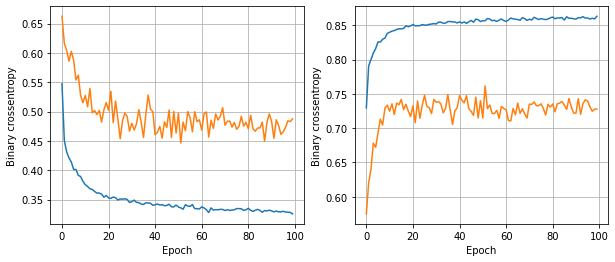

119/119 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8717
[0.3180517256259918, 0.8717139959335327]
16 nodes, dropout 0.2, lr 0.001, batch_size 64


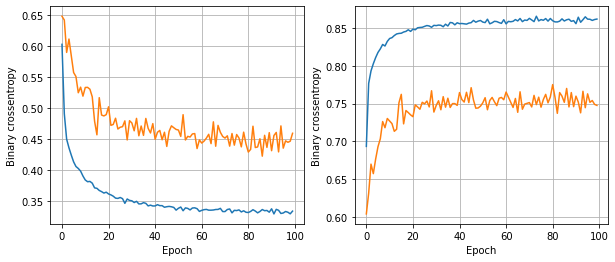

119/119 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8709
[0.3173181116580963, 0.8709253668785095]
16 nodes, dropout 0.2, lr 0.001, batch_size 128


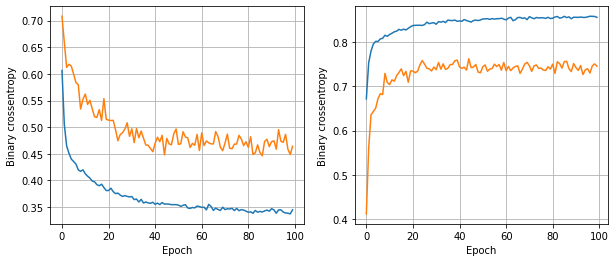

119/119 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8678
[0.3263249397277832, 0.867770791053772]
32 nodes, dropout 0, lr 0.01, batch_size 32


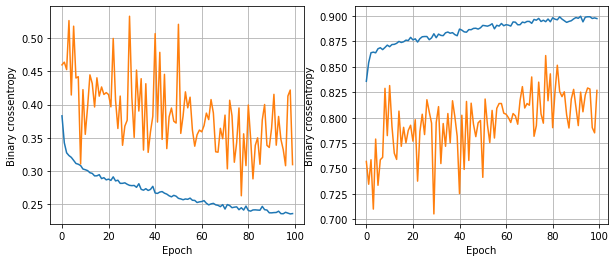

119/119 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8630
[0.36341360211372375, 0.8630388975143433]
32 nodes, dropout 0, lr 0.01, batch_size 64


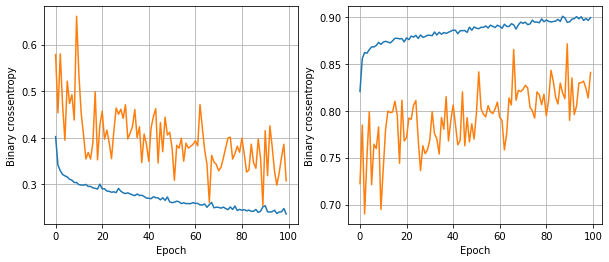

119/119 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8667
[0.3490948975086212, 0.8667192459106445]
32 nodes, dropout 0, lr 0.01, batch_size 128


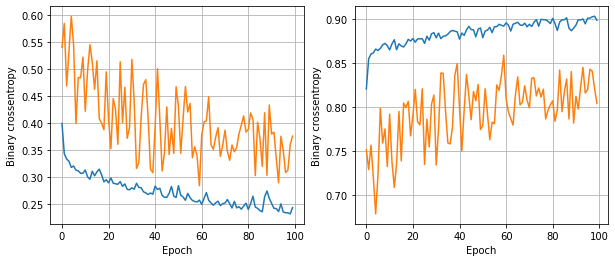

119/119 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8686
[0.33908894658088684, 0.8685594201087952]
32 nodes, dropout 0, lr 0.005, batch_size 32


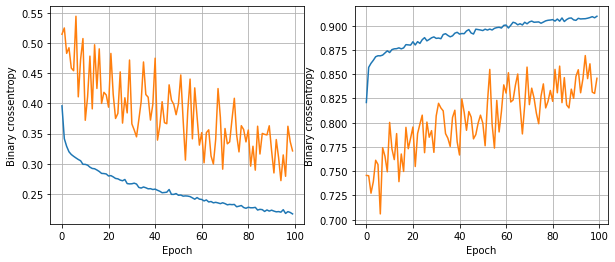

119/119 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8672
[0.3647780418395996, 0.8672450184822083]
32 nodes, dropout 0, lr 0.005, batch_size 64


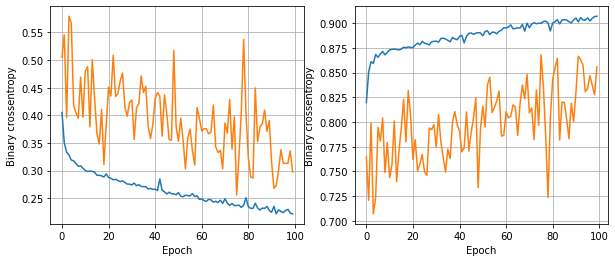

119/119 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8649
[0.3518681526184082, 0.8648790717124939]
32 nodes, dropout 0, lr 0.005, batch_size 128


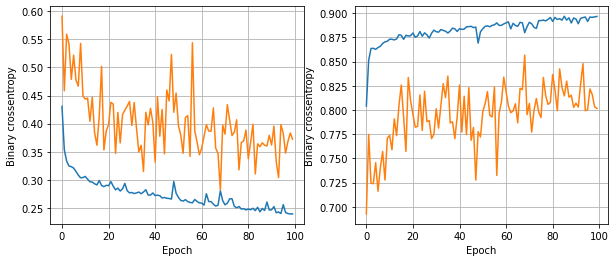

119/119 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8644
[0.33482375741004944, 0.8643532991409302]
32 nodes, dropout 0, lr 0.001, batch_size 32


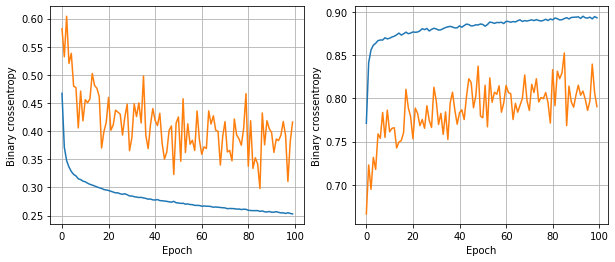

119/119 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8736
[0.31633082032203674, 0.8735541701316833]
32 nodes, dropout 0, lr 0.001, batch_size 64


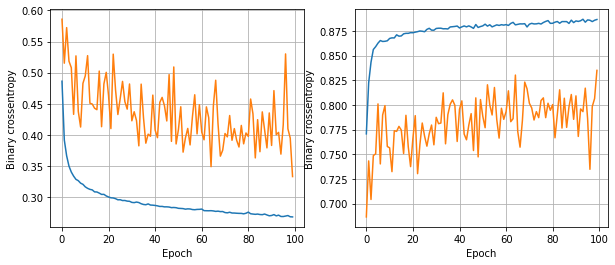

119/119 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8623
[0.32515668869018555, 0.8622502684593201]
32 nodes, dropout 0, lr 0.001, batch_size 128


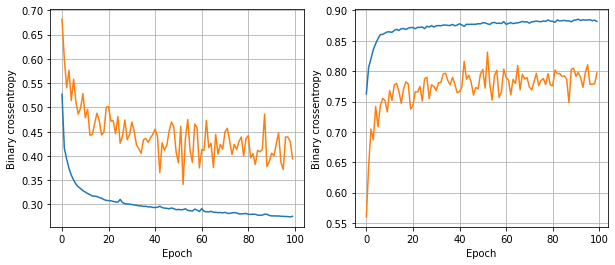

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8704
[0.31363236904144287, 0.8703995943069458]
32 nodes, dropout 0.2, lr 0.01, batch_size 32


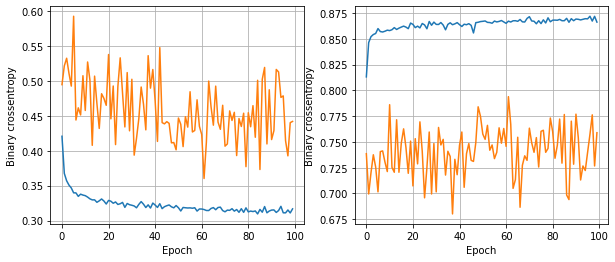

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8712
[0.31088995933532715, 0.871188223361969]
32 nodes, dropout 0.2, lr 0.01, batch_size 64


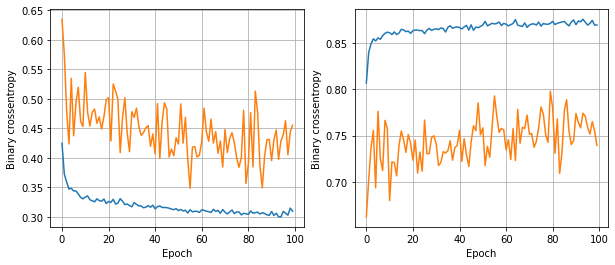

119/119 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8759
[0.30509135127067566, 0.8759200572967529]
32 nodes, dropout 0.2, lr 0.01, batch_size 128


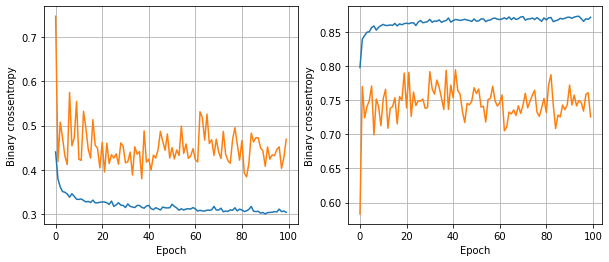

119/119 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8659
[0.3130631744861603, 0.8659306168556213]
32 nodes, dropout 0.2, lr 0.005, batch_size 32


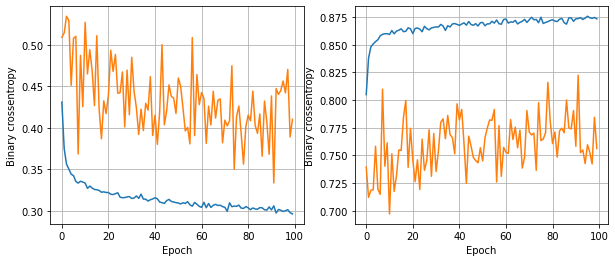

119/119 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8762
[0.3092672824859619, 0.8761829733848572]
32 nodes, dropout 0.2, lr 0.005, batch_size 64


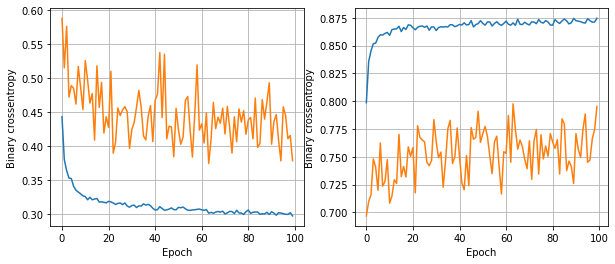

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8691
[0.311149537563324, 0.8690851926803589]
32 nodes, dropout 0.2, lr 0.005, batch_size 128


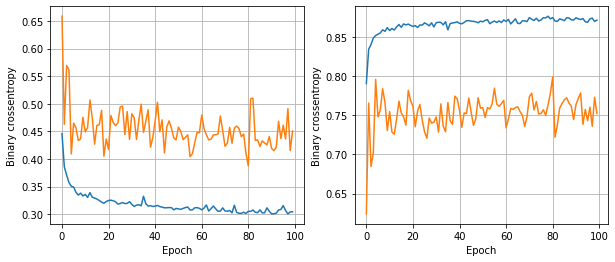

119/119 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8691
[0.31029200553894043, 0.8690851926803589]
32 nodes, dropout 0.2, lr 0.001, batch_size 32


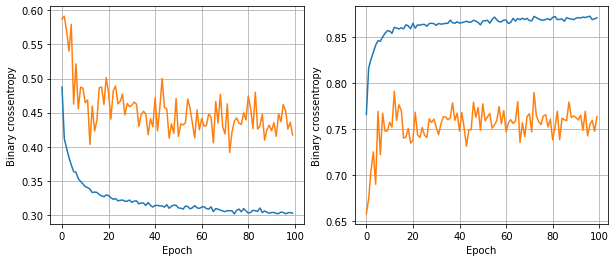

119/119 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8730
[0.30793651938438416, 0.8730283975601196]
32 nodes, dropout 0.2, lr 0.001, batch_size 64


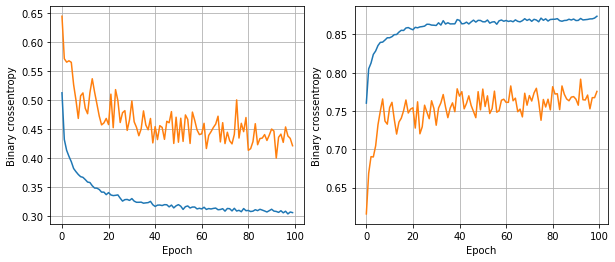

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8722
[0.30805206298828125, 0.8722397685050964]
32 nodes, dropout 0.2, lr 0.001, batch_size 128


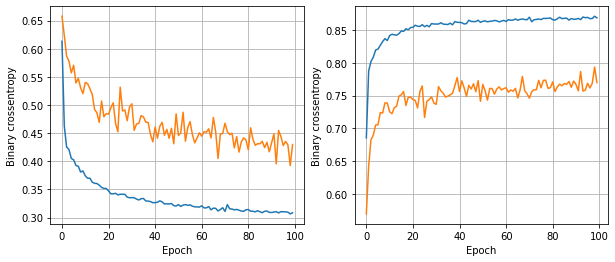

119/119 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8728
[0.3077418804168701, 0.8727654814720154]
64 nodes, dropout 0, lr 0.01, batch_size 32


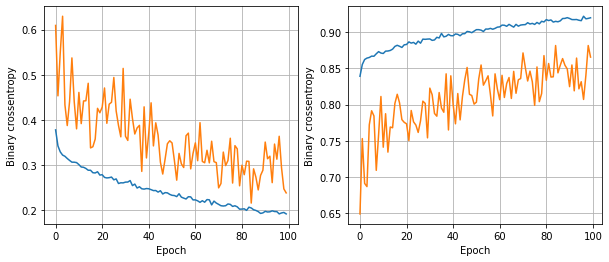

119/119 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8646
[0.4453750252723694, 0.8646162152290344]
64 nodes, dropout 0, lr 0.01, batch_size 64


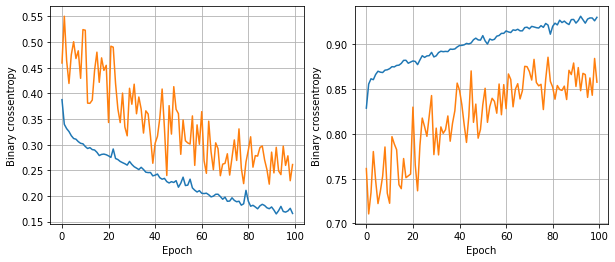

119/119 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.8754
[0.46200481057167053, 0.875394344329834]
64 nodes, dropout 0, lr 0.01, batch_size 128


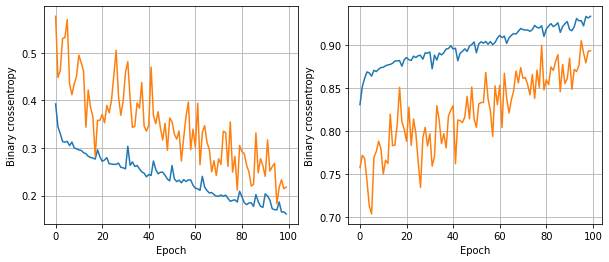

119/119 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8667
[0.4778463542461395, 0.8667192459106445]
64 nodes, dropout 0, lr 0.005, batch_size 32


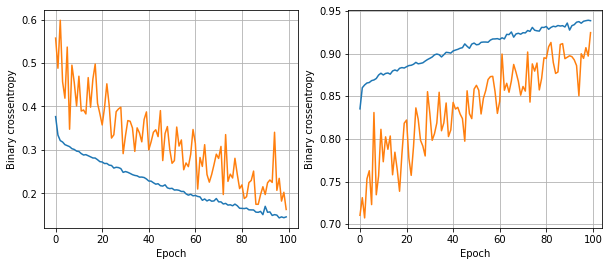

119/119 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.8491
[0.5317839980125427, 0.8491061925888062]
64 nodes, dropout 0, lr 0.005, batch_size 64


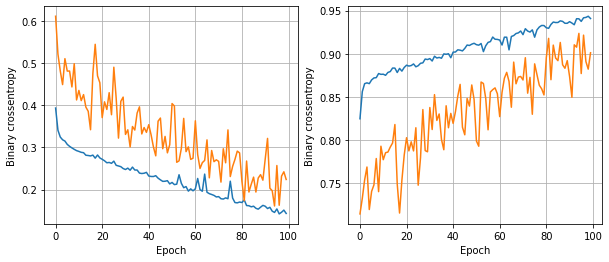

119/119 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.8596
[0.5666837692260742, 0.8596214652061462]
64 nodes, dropout 0, lr 0.005, batch_size 128


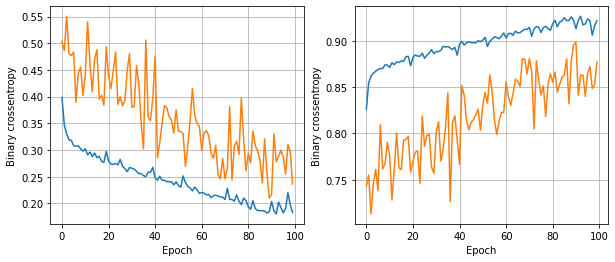

119/119 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8638
[0.38413336873054504, 0.8638275265693665]
64 nodes, dropout 0, lr 0.001, batch_size 32


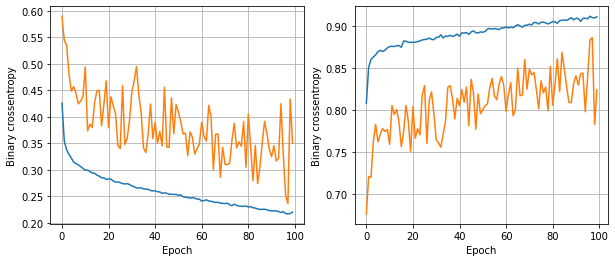

119/119 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8704
[0.3226568400859833, 0.8703995943069458]
64 nodes, dropout 0, lr 0.001, batch_size 64


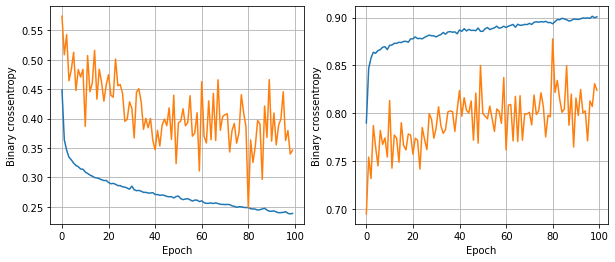

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8751
[0.31772613525390625, 0.8751314282417297]
64 nodes, dropout 0, lr 0.001, batch_size 128


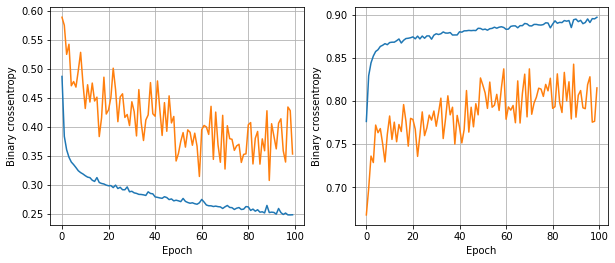

119/119 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8709
[0.31445586681365967, 0.8709253668785095]
64 nodes, dropout 0.2, lr 0.01, batch_size 32


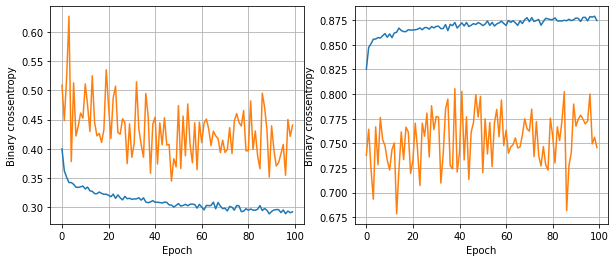

119/119 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8720
[0.3166859745979309, 0.8719768524169922]
64 nodes, dropout 0.2, lr 0.01, batch_size 64


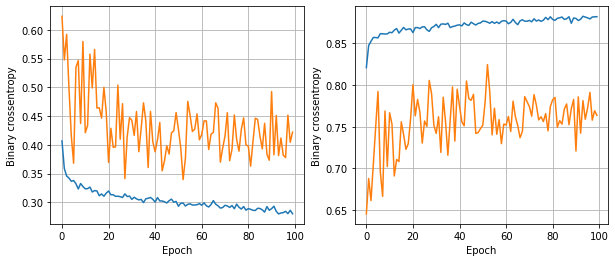

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8733
[0.3171790838241577, 0.8732912540435791]
64 nodes, dropout 0.2, lr 0.01, batch_size 128


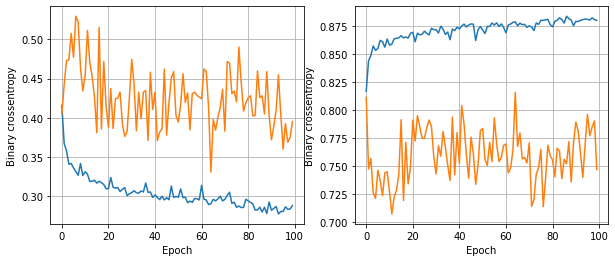

119/119 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8667
[0.30949196219444275, 0.8667192459106445]
64 nodes, dropout 0.2, lr 0.005, batch_size 32


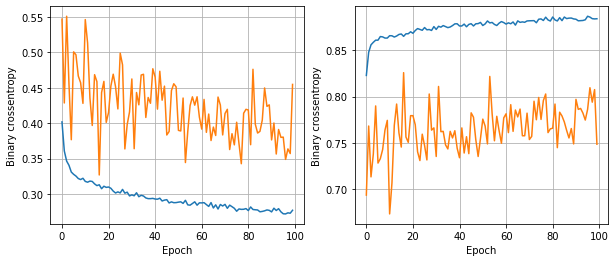

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8709
[0.30883631110191345, 0.8709253668785095]
64 nodes, dropout 0.2, lr 0.005, batch_size 64


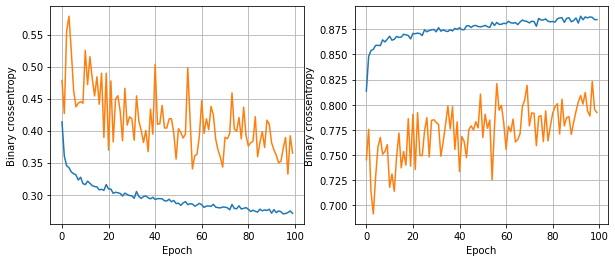

119/119 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8801
[0.2954797148704529, 0.8801261782646179]
64 nodes, dropout 0.2, lr 0.005, batch_size 128


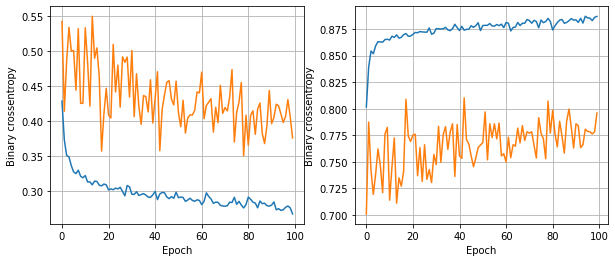

119/119 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8767
[0.29807475209236145, 0.8767087459564209]
64 nodes, dropout 0.2, lr 0.001, batch_size 32


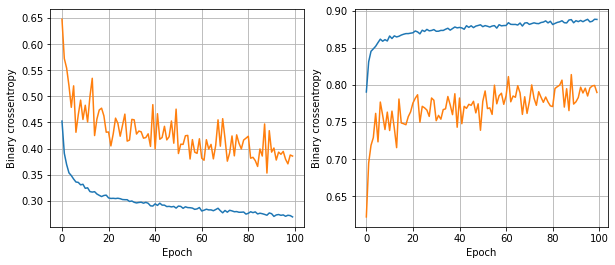

119/119 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8788
[0.29912927746772766, 0.878811776638031]
64 nodes, dropout 0.2, lr 0.001, batch_size 64


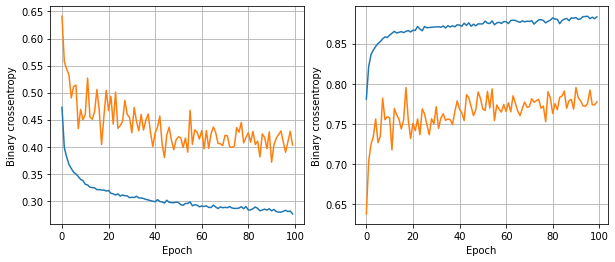

119/119 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8809
[0.2984312176704407, 0.8809148073196411]
64 nodes, dropout 0.2, lr 0.001, batch_size 128


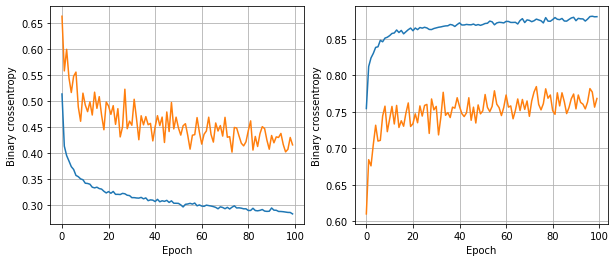

119/119 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8751
[0.30275458097457886, 0.8751314282417297]


In [55]:
least_val_loss = float('inf')
least_loss_model = None

epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_probab in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_probab}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_probab, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)

        print(val_loss)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_loss_model = model

In [56]:
print(least_val_loss)

0.2954797148704529
